<a href="https://colab.research.google.com/github/leticiaram/RIIAA_2021/blob/main/notebooks/2_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Recurrent Neural Network (RNN)

## Descripción

Una red neuronal recurrente -abreviada RNR en español o RNN
en inglés- es una red neuronal que tiene un estado oculto $h$ y una secuencia de salida opcional $y$, que opera sobre una variable de secuencia variable, $x = (x_1, . . . , x_T)$, cuyos elementos están comunmente indizados por una variable temporal. En cada paso $t$ del proceso de entrenamiento, el estado oculto $h_{t}$ se actualiza como sigue
$$
h_{t}= f(h_{t-1}, x_t)
$$
donde $f$ es una función de activación no lineal.

Dos de las capas más populares del tipo recurrente son la GRU y LSTM (Long- Short-Term Memory). De estas utilizamos la LSTM en este material.

![LSTM1](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/figs/LSTM1.png)





![LSTM](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/figs/LSTM.png)

## Ejemplo 1 : Datos sinusoidales

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

# upload external file before import
from google.colab import files
#files.upload()
#import helper

#files.upload()
#import fc_model

Simulamos una base de datos de varias series sinosoidales de misma longitud, pero diferentes inicios

In [ ]:
nseries = 100  # número de series sinusuidales
length = 200   # número de puntos donde se observa cada serie
T = 20         # parámetro para crear diversas series y escalar el tiempo

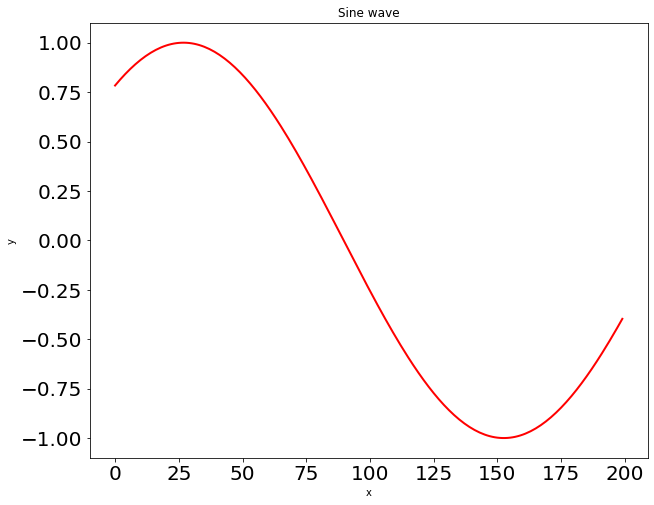

In [ ]:
np.random.seed(2021)
x=np.empty((nseries,length),np.float32)
x[:]=np.array(range(length))+np.random.randint(-4*T,4*T,nseries).reshape(nseries,1)
y=np.sin(x/2.0/T).astype(np.float32)

plt.figure(figsize=(10,8))
plt.title("Sine wave")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.arange(x.shape[1]),y[0,:],'r',linewidth=2.0)

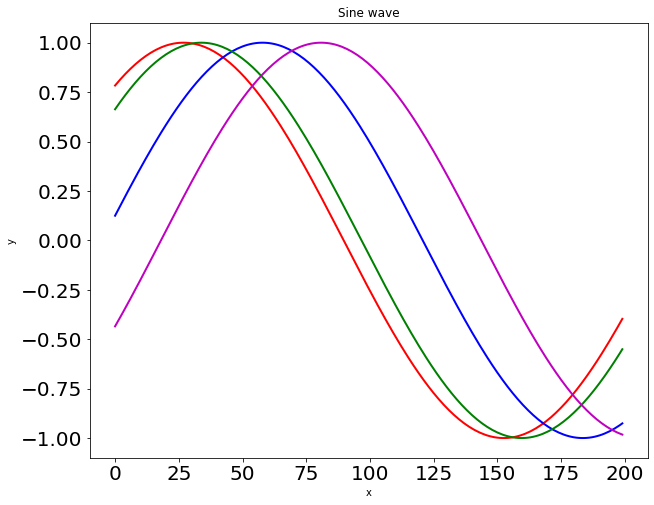

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Sine wave")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.arange(x.shape[1]),y[0,:].tolist(),'r',linewidth=2.0)
plt.plot(np.arange(x.shape[1]),y[1,:].tolist(),'b',linewidth=2.0)
plt.plot(np.arange(x.shape[1]),y[4,:].tolist(),'g',linewidth=2.0)
plt.plot(np.arange(x.shape[1]),y[7,:].tolist(),'m',linewidth=2.0)

Especificamos el modelo, que en este caso será LSTM (Long-Short Term Memory)


In [ ]:
class LSTMPredictor(nn.Module):
    def __init__(self,n_hidden=51):
        super(LSTMPredictor,self).__init__()
        self.n_hidden = n_hidden
        # Construimos un modelo LSTM con dos capas
        self.lstm1 = nn.LSTMCell(input_size = 1, hidden_size = self.n_hidden)
        self.lstm2 = nn.LSTMCell(self.n_hidden,self.n_hidden)
        # self.dropout = nn.Dropout(p=0.5)  # capa de dropout para las segunda capa 
        self.linear = nn.Linear(self.n_hidden,1) #capa completamente conectada de salida
        
    def forward(self, x, future=0):
      #   x es la entrada del modelo. x[t] input de shape (batch, input_size) al tiempo t
      
        outputs = []
        n_samples = x.size(0)
        
        #inicializamos los estados de ocultos y de la célula
        h_t = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32)
        c_t = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32)
        h_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32)
        c_t2 = torch.zeros(n_samples,self.n_hidden,dtype=torch.float32)
        
        for input_t in x.split(1, dim = 1):
            h_t,c_t = self.lstm1(input_t,(h_t,c_t))
            h_t2,c_t2 = self.lstm2(h_t,(h_t2,c_t2))
            output = self.linear(h_t2)
            outputs.append(output)
            
        for i in range(future):
            h_t,c_t = self.lstm1(output,(h_t,c_t))
            h_t2,c_t2 = self.lstm2(h_t,(h_t2,c_t2))
            output = self.linear(h_t2)
            outputs.append(output)
            
        outputs =  torch.cat(outputs,dim=1)
        return outputs        


Step 0
loss 0.49526941776275635
loss 0.4928314685821533
loss 0.3122531771659851
loss 0.07887223362922668
loss 0.25401127338409424
loss 0.02187887765467167
loss 0.02070721425116062
loss 0.01921543851494789
loss 0.01751955971121788
loss 0.014611686579883099
loss 0.010453564114868641
loss 0.00908648781478405
loss 0.00870046578347683
loss 0.008291994221508503
loss 0.007874290458858013
loss 0.007052570581436157
loss 0.0049576545134186745
loss 0.004440920427441597
loss 0.002746286103501916
loss 0.002374299569055438
test loss 0.0013174627674743533
Step 1
loss 0.0019395736744627357
loss 0.0017620186554268003
loss 0.0015794836217537522
loss 0.0014359877677634358
loss 0.0013338198186829686
loss 0.0011618476128205657
loss 0.0010180363897234201
loss 0.0009670488070696592
loss 0.0009510377421975136
loss 0.0009466632618568838
loss 0.0009401423740200698
loss 0.0009244762477464974
loss 0.0008879521628841758
loss 0.0008301097550429404
loss 0.0007455524755641818
loss 0.0006578624597750604
loss 0.0005786

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

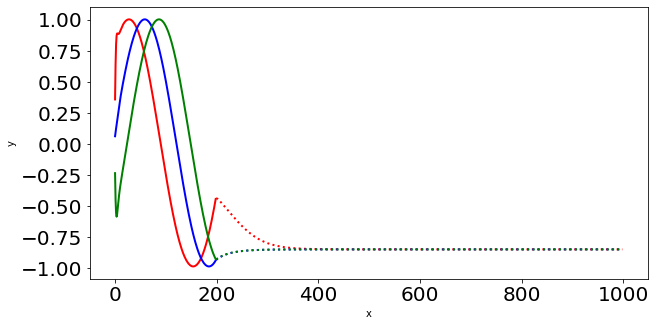

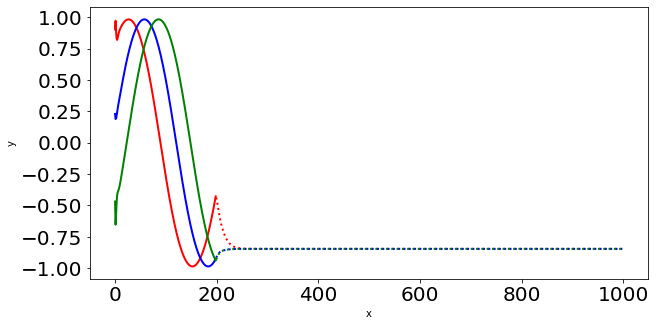

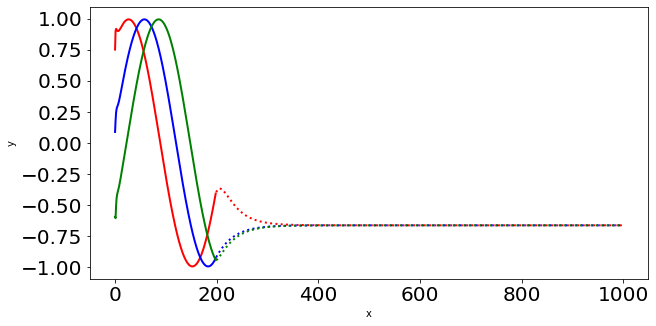

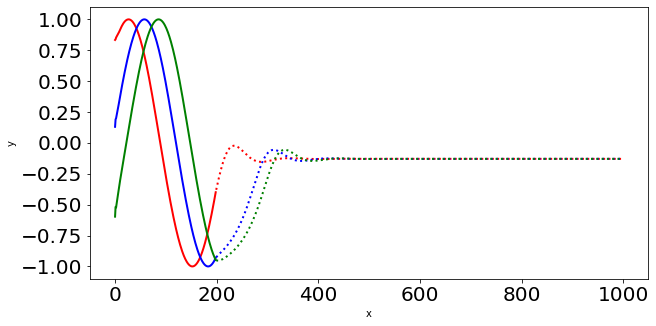

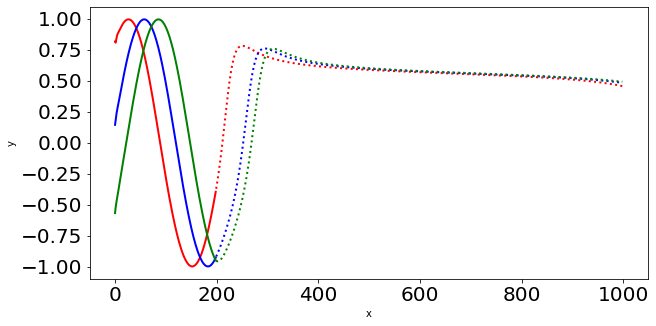

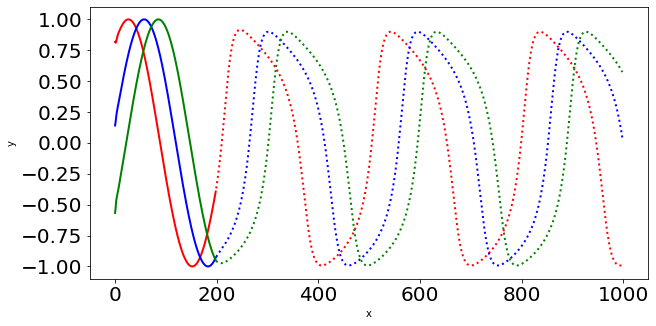

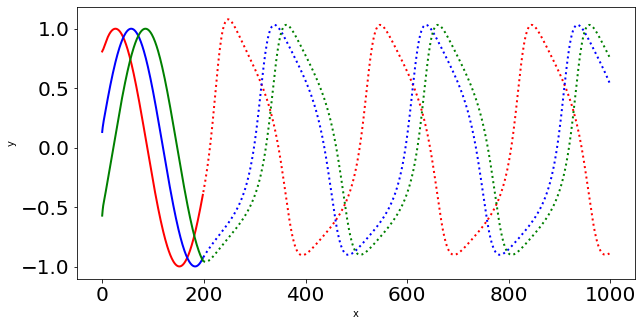

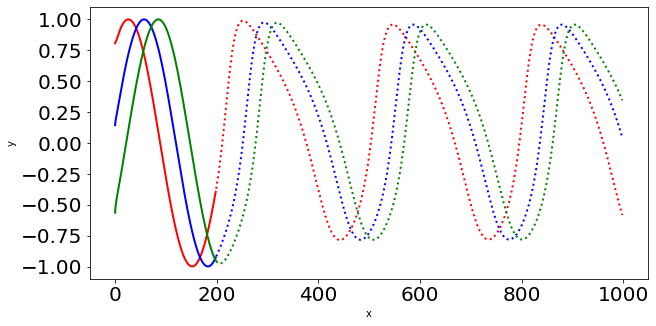

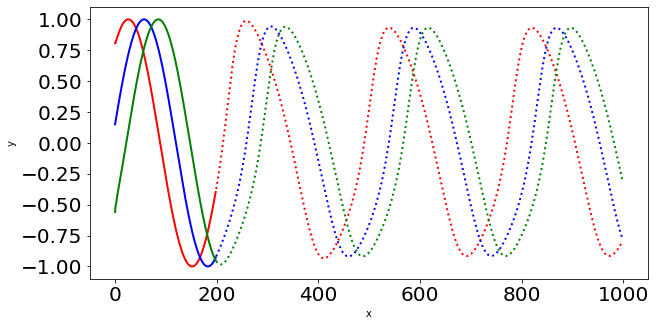

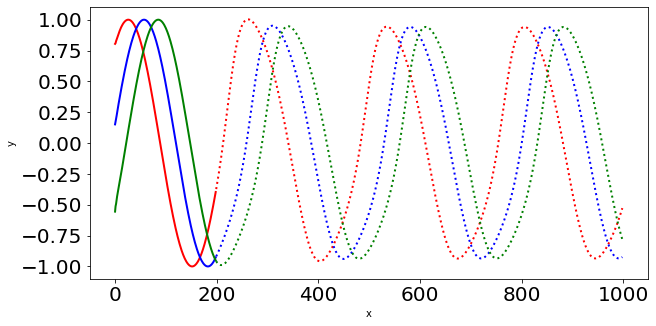

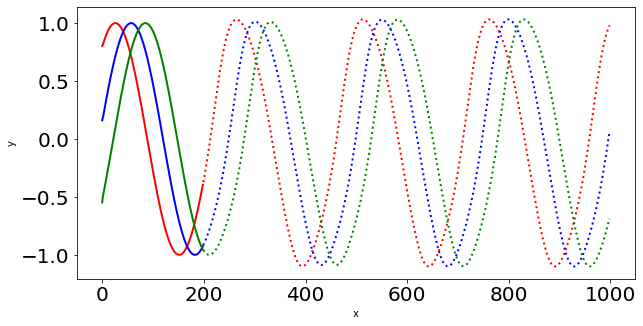

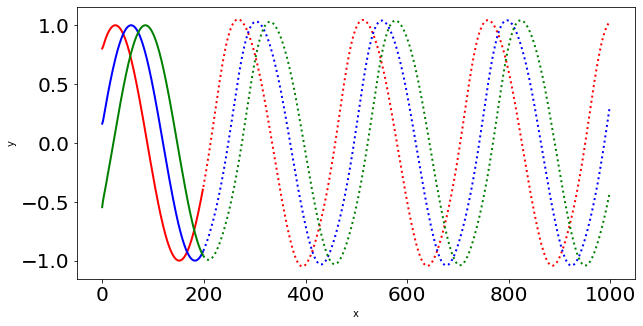

In [ ]:
np.random.seed(2021)
torch.manual_seed(0)

if __name__=="__main__":
    # y: 100x1000
    train_input = torch.from_numpy(y[3:,:-1])
    train_target = torch.from_numpy(y[3:, 1:])
    test_input = torch.from_numpy(y[:3, :-1])
    test_target = torch.from_numpy(y[:3, 1:])
    
    model = LSTMPredictor()
    criterion = nn.MSELoss()
    
    optimizer = optim.LBFGS(model.parameters(),lr=0.8)
    
    n_steps = 12  # épocas
    for i in range(n_steps):
        print("Step", i)
        
        def closure():
            optimizer.zero_grad()  # muy importante
            out = model(train_input)
            loss = criterion(out,train_target) #la pérdida actual
            print("loss", loss.item())
            loss.backward()  #calcula los gradientes
            return loss
        
        optimizer.step(closure) # actualiza los parámetros del modelo
        
        with torch.no_grad():
            future = 800
            pred = model(test_input,future=future)
            loss = criterion(pred[:,:-future], test_target) 
            print("test loss", loss.item()) # pérdia en el conjunto de prueba
            y_p = pred.detach().numpy()
        

        torch.save(model.state_dict(), 'LSTMP1.pth')

        #Dibuja el gráfico de datos y predicción 
        plt.figure(figsize=(10,5))
        plt.title(f"")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        n = train_input.shape[1]
        def draw(y_i,color):
            plt.plot(np.arange(n),y_i[:n],color,linewidth=2.0)
            plt.plot(np.arange(n, n+future),y_i[n:],color+":",linewidth=2.0)
            
        draw(y_p[0],'r')
        draw(y_p[1],'b')
        draw(y_p[2],'g')
        
 #       plt.savefig("predict%d.pdf"%i)
 #       plt.close()

    # download checkpoint file
    files.download('LSTMP1.pth')

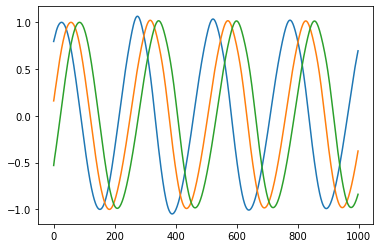

In [ ]:
plt.plot(np.transpose(y_p))

### Predicción de datos nuevos

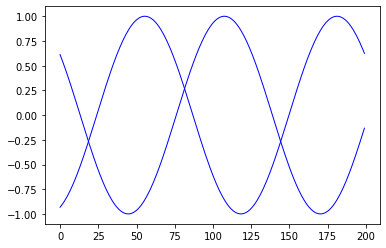

In [ ]:
np.random.seed(21)
x_new = np.empty((2,length),np.float32)
x_new[:]= np.array(range(length))+np.random.randint(-4*T,4*T,2).reshape(2,1)
y_new = np.sin(x_new/2.0/10).astype(np.float32)   #T=10
plt.plot(np.transpose(y_new),'b',linewidth=1.0)

In [ ]:
pred_new = model(torch.from_numpy(y_new),future=200)
y_p_new = pred_new.detach().numpy()
print(y_p_new.shape)

(2, 400)


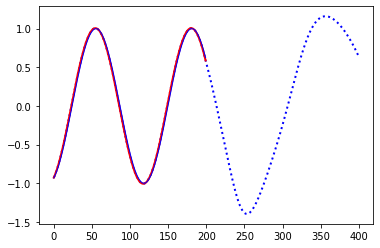

In [ ]:
plt.plot(np.arange(400), y_p_new[0,],'b'+":",linewidth=2.0)
plt.plot(np.arange(200),y_p_new[0,:200],'r',linewidth=2.0)
plt.plot(y_new[0,:length],'b',linewidth=1.0)

## Ejemplo 2: Datos sinosoidales con ruido

In [ ]:
nseries = 100  # número de series sinusuidales
length = 200   # número de puntos donde se observa cada serie
T = 20         # parámetro para crear diversas series y escalar el tiempo

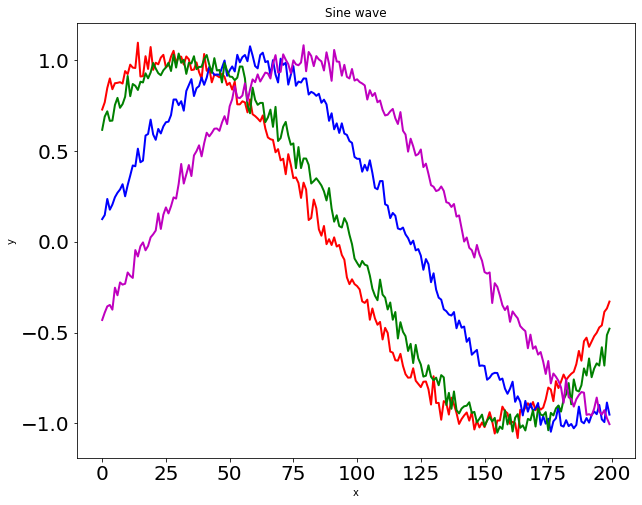

In [ ]:
np.random.seed(2021)
x=np.empty((nseries,length),np.float32)
x[:]=np.array(range(length))+np.random.randint(-4*T,4*T,nseries).reshape(nseries,1)
y=np.sin(x/2.0/T)+np.random.randn(nseries,length)*0.04
y=y.astype(np.float32)

plt.figure(figsize=(10,8))
plt.title("Sine wave")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.arange(x.shape[1]),y[0,:].tolist(),'r',linewidth=2.0)
plt.plot(np.arange(x.shape[1]),y[1,:].tolist(),'b',linewidth=2.0)
plt.plot(np.arange(x.shape[1]),y[4,:].tolist(),'g',linewidth=2.0)
plt.plot(np.arange(x.shape[1]),y[7,:].tolist(),'m',linewidth=2.0)

Step 0
test loss 0.004208092112094164
Step 1
test loss 0.0030370161402970552
Step 2
test loss 0.0028218752704560757
Step 3
test loss 0.00253060320392251
Step 4
test loss 0.0023069572634994984
Step 5
test loss 0.002222426701337099
Step 6
test loss 0.0021748170256614685
Step 7
test loss 0.002046088455244899
Step 8
test loss 0.001956208376213908
Step 9
test loss 0.0019089687848463655
Step 10
test loss 0.0018637964967638254
Step 11
test loss 0.0018295658519491553


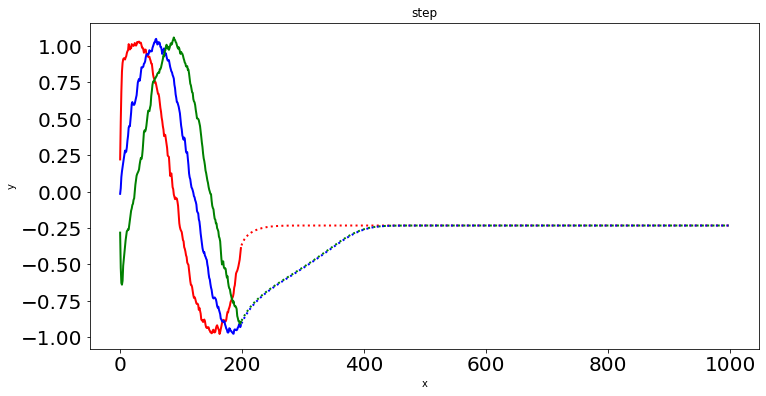

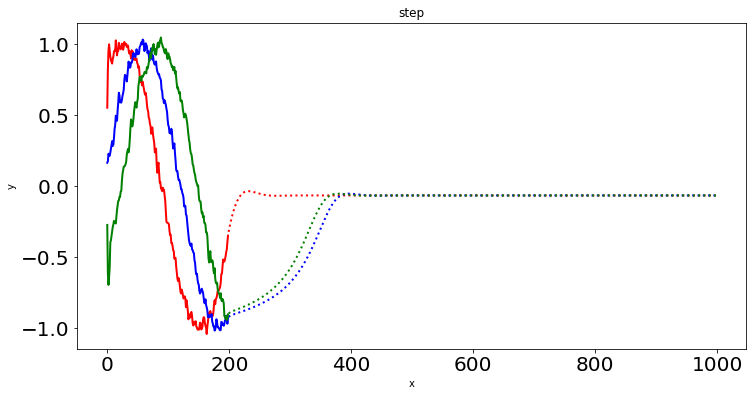

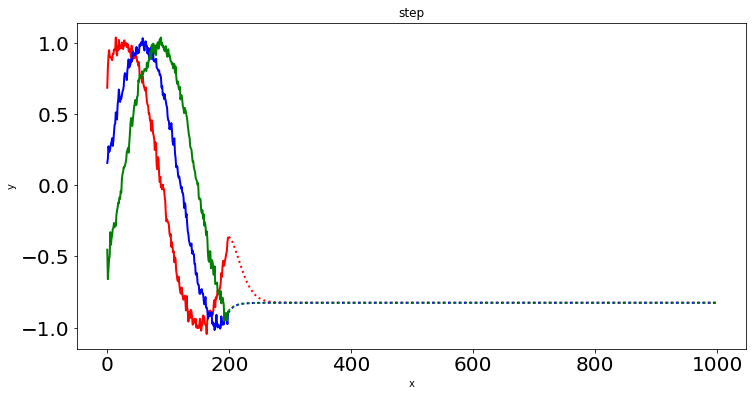

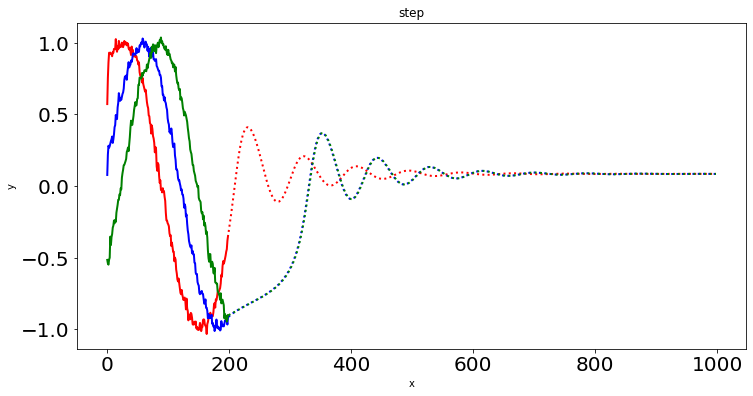

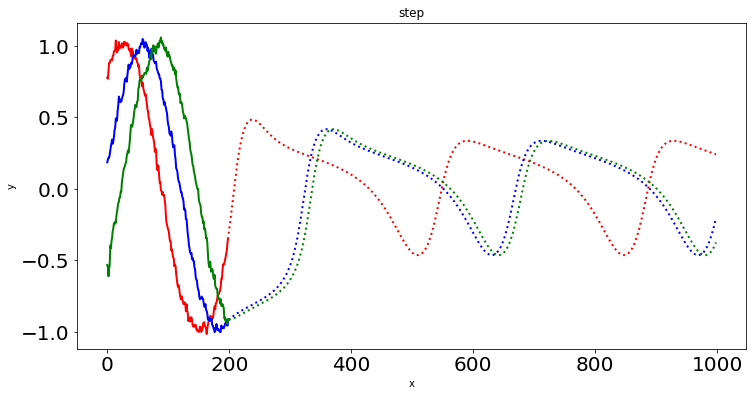

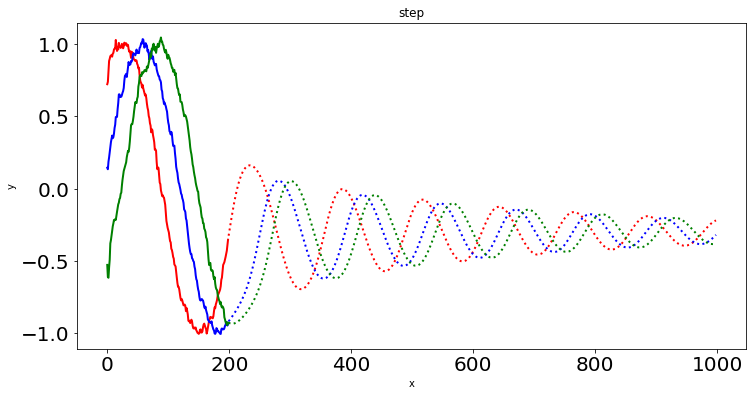

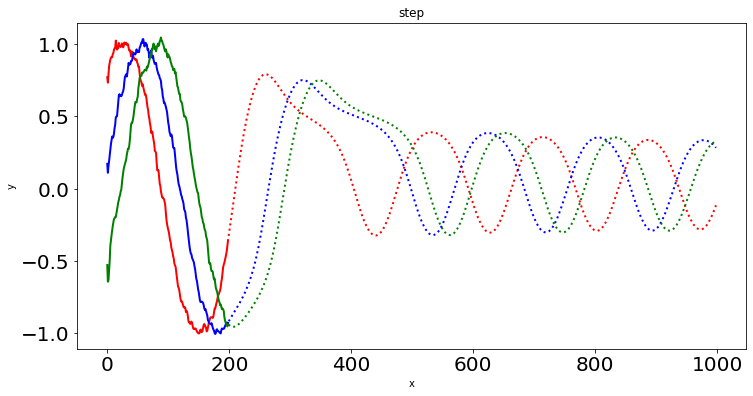

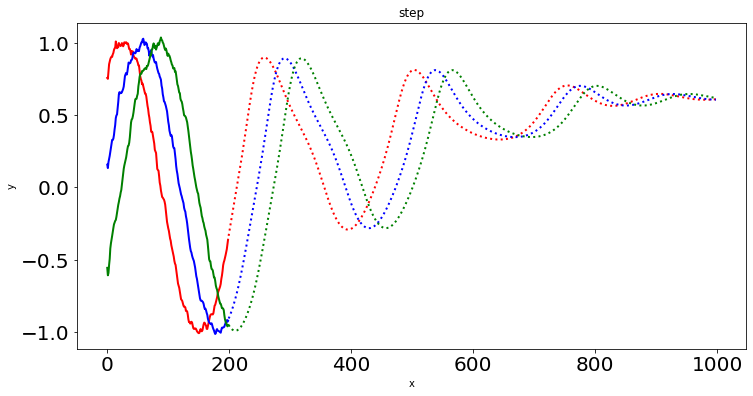

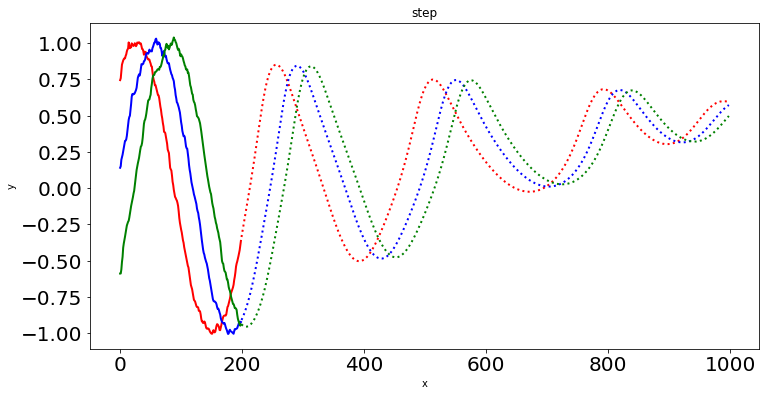

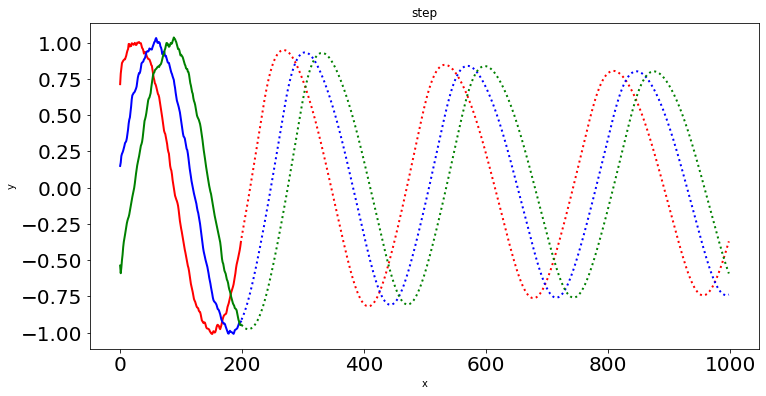

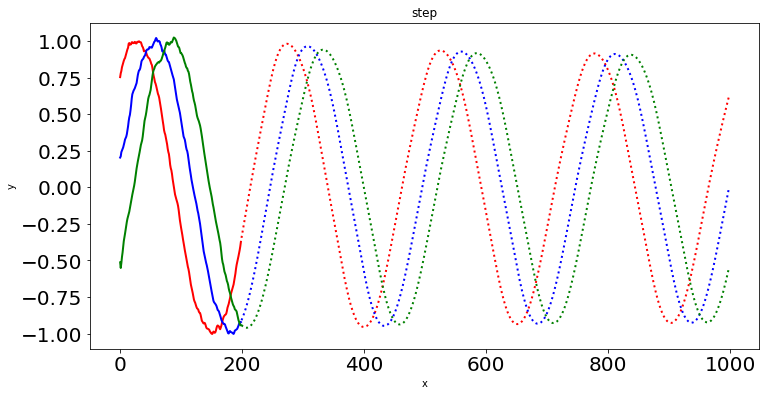

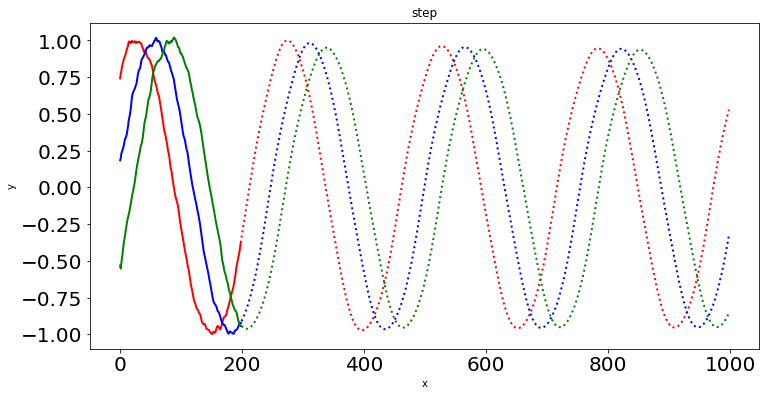

In [ ]:
np.random.seed(2021)
torch.manual_seed(0)

if __name__=="__main__":
    # y: 100x1000
    train_input = torch.from_numpy(y[3:,:-1])
    train_target = torch.from_numpy(y[3:, 1:])
    test_input = torch.from_numpy(y[:3, :-1])
    test_target = torch.from_numpy(y[:3, 1:])
    
    model = LSTMPredictor()
    criterion = nn.MSELoss()
    
    optimizer = optim.LBFGS(model.parameters(),lr=0.8)
    
    n_steps = 12
    for i in range(n_steps):
        print("Step", i)
        
        def closure():
            optimizer.zero_grad()
            out = model(train_input)
            loss = criterion(out,train_target)
            #print("loss", loss.item())
            loss.backward()
            return loss
        
        optimizer.step(closure)
        
        with torch.no_grad():
            future = 800
            pred = model(test_input,future=future)
            loss = criterion(pred[:,:-future], test_target)
            print("test loss", loss.item())
            y_p = pred.detach().numpy()
    
        plt.figure(figsize=(12,6))
        plt.title(f"step")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        n = train_input.shape[1]
        def draw(y_i,color):
            plt.plot(np.arange(n),y_i[:n],color,linewidth=2.0)
            plt.plot(np.arange(n, n+future),y_i[n:],color+":",linewidth=2.0)
            
        draw(y_p[0],'r')
        draw(y_p[1],'b')
        draw(y_p[2],'g')

## Ejemplo 3: Brotes en redes

Generamos datos de brotes en redes

In [ ]:
!pip install EoN
import EoN
import networkx as nx
from matplotlib import rc
import matplotlib.pylab as plt

#import scipy
#import random
import numpy as np
import pandas as pd

import scipy.stats as stats

     |████████████████████████████████| 113 kB 5.0 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=7602a1231eeb19168ded9e1270eff7a08ec0b11d6b291307303e53e2c1707277
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


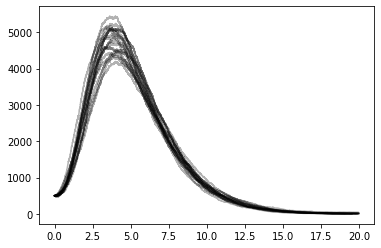

In [ ]:
N=10**5   #cien mil nodos

tmax = 20
iterations = 20  # corre 20 simulaciones
tau = 0.1        # tasa de transmisión
gamma = 1.0      # tasa de recuperación
rho = 0.005      # fracción aleatoria de casos infectados iniciales

Inc_mat = np.ones((iterations,21),np.long)*0.

np.random.seed(2021)

for i in range(iterations):     # corre la simulaciones
  G = nx.barabasi_albert_graph(N, 5)
  t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
  if i == 0:
    plt.plot(t, I, color = 'k', alpha=0.3, label='Simulation')
  plt.plot(t, I, color = 'k', alpha=0.3)
  #calculo de la incidencia
  Su=np.unique(S, return_index=True)
  indxsort=np.sort(Su[1])  #indices asociados a la infección de individuos
  #S[indxsort]; t[indxsort]
  ##incidencia = N - S[indxsort] #los casos crecen de 1 en 1 en los tiempos t[indxsort]
  group=pd.cut(t[indxsort], range(0, 20), include_lowest=True)
  incidencia=group.value_counts() #la incidencia en intervalos
  Inc_mat[i,range(incidencia.shape[0])] = incidencia
 

Grafica de la incidencia discreta

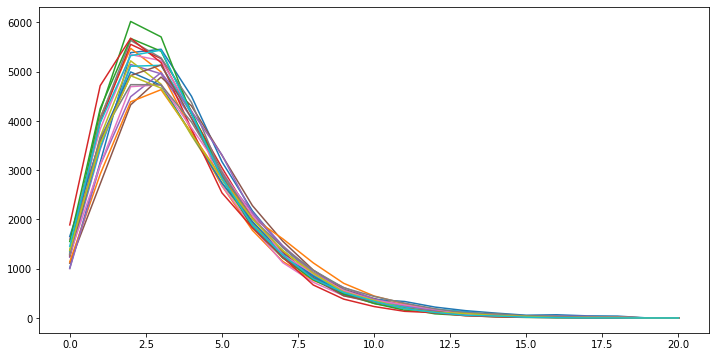

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.transpose(Inc_mat))

Convertimos los datos en proporciones de personas

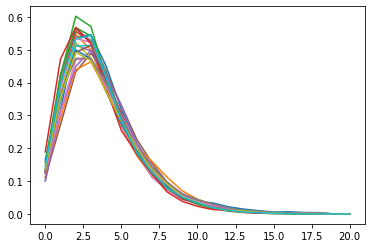

In [ ]:
y = Inc_mat[:,:] /N*10
y = y.astype(np.float32)
plt.plot(np.transpose(y))

Step 0
test loss 0.0038552931509912014
Step 1
test loss 0.0004254260566085577
Step 2
test loss 0.00037953187711536884
Step 3
test loss 0.0002969105262309313
Step 4
test loss 0.0003064689226448536
Step 5
test loss 0.00025299942353740335
Step 6
test loss 0.00021293833560775965
Step 7
test loss 0.00022368969803210348
Step 8
test loss 0.0002355139295104891
Step 9
test loss 0.00022384336625691503


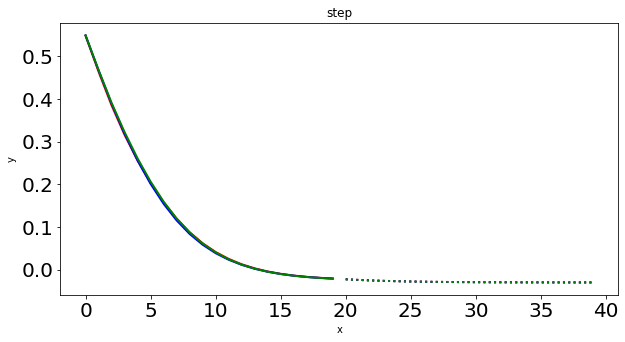

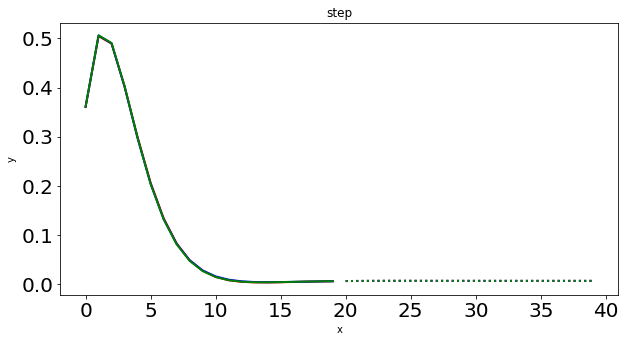

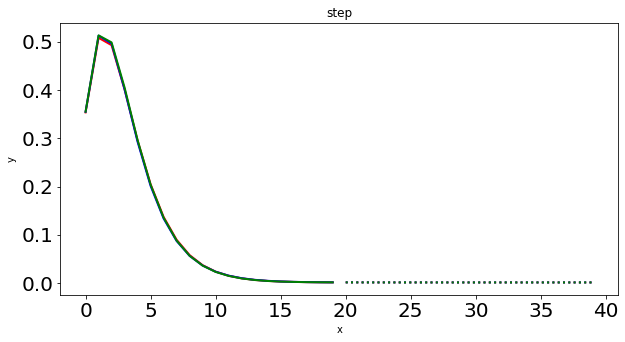

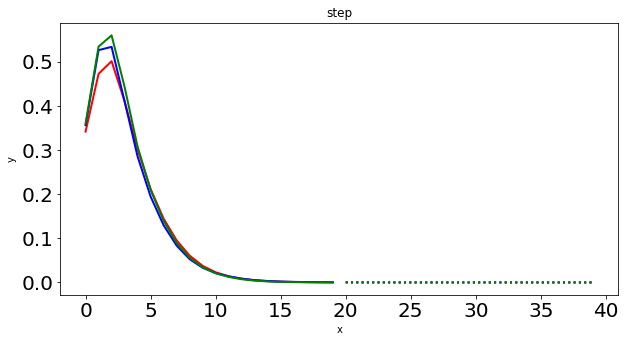

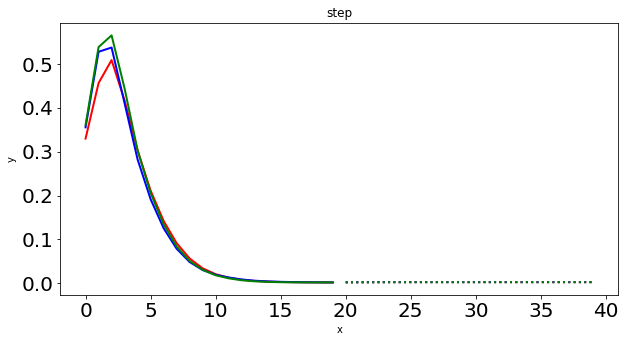

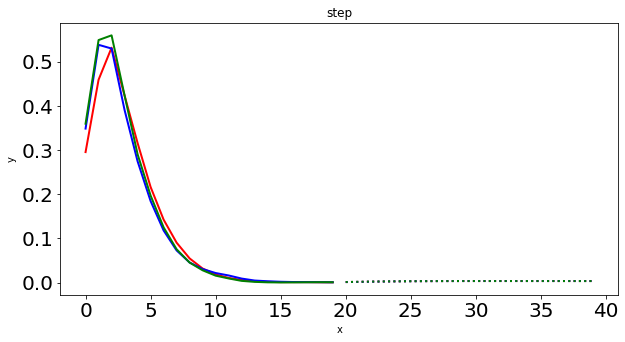

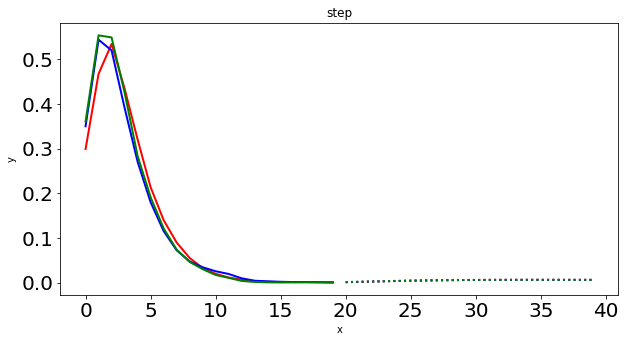

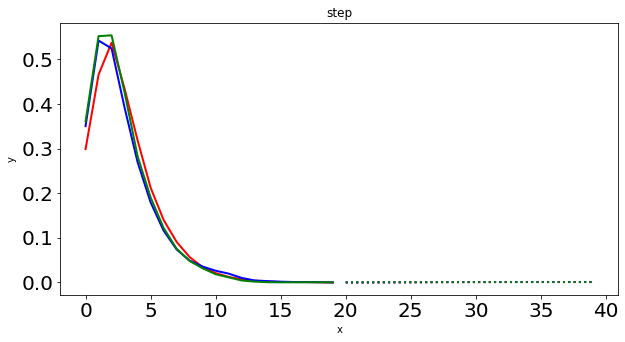

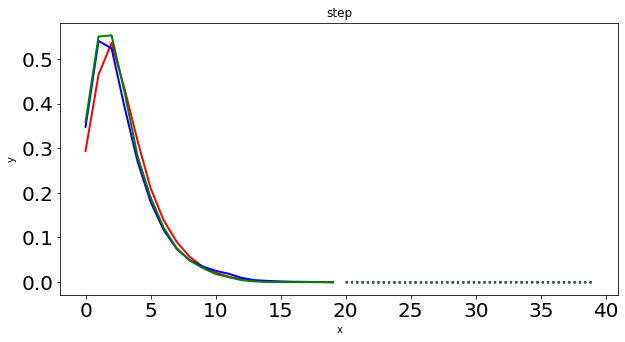

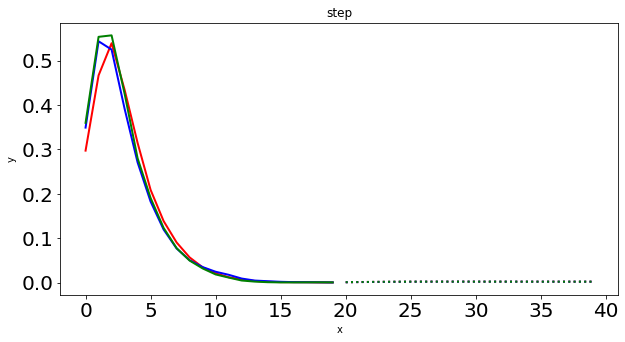

In [ ]:
np.random.seed(2021)
torch.manual_seed(10)

if __name__=="__main__":
    train_input = torch.from_numpy(y[5:,:-1])
    train_target = torch.from_numpy(y[5:, 1:])
    test_input = torch.from_numpy(y[:5, :-1])
    test_target = torch.from_numpy(y[:5, 1:])
    
    model = LSTMPredictor()
    criterion = nn.MSELoss()
    
    optimizer = optim.LBFGS(model.parameters(),lr=0.8)
    
    n_steps = 10
    for i in range(n_steps):
        print("Step", i)
        
        def closure():
            optimizer.zero_grad()
            out = model(train_input)
            loss = criterion(out,train_target)
            #print("loss", loss.item())
            loss.backward()
            return loss
        
        optimizer.step(closure)
        
        with torch.no_grad():
            future = 20 
            pred = model(test_input,future = future)
            loss = criterion(pred[:,:-future], test_target)
            print("test loss", loss.item())
            y_p =  pred.detach().numpy()
    
        plt.figure(figsize=(10,5))
        plt.title(f"step")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        n = train_input.shape[1]
        def draw(y_i,color):
            plt.plot(np.arange(n),y_i[:n],color,linewidth=2.0)
            plt.plot(np.arange(n, n+future),y_i[n:],color+":",linewidth=2.0)
            
        draw(y_p[0],'r')
        draw(y_p[1],'b')
        draw(y_p[2],'g')
        

### Predición

In [ ]:
G = nx.barabasi_albert_graph(N, 5)
t, S, I, R = EoN.fast_SIR(G, tau, gamma, rho=rho, tmax = tmax)
Su = np.unique(S, return_index=True)
indxsort = np.sort(Su[1])  #indices asociados a la infección de individuos
group = pd.cut(t[indxsort], range(0, 20), include_lowest=True)
inc_new = group.value_counts() #la incidencia en intervalos
#inc_new

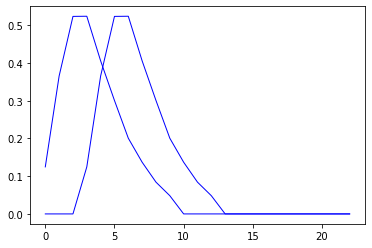

In [ ]:
np.random.seed(21)
inc_new_mat = np.zeros((2,23),np.float32)
inc_new_mat[0,:10] = inc_new[0:10]
inc_new_mat[1,3:13] = inc_new[0:10]
inc_new_mat=inc_new_mat/N*10
plt.plot(np.transpose(inc_new_mat),'b',linewidth=1.0)


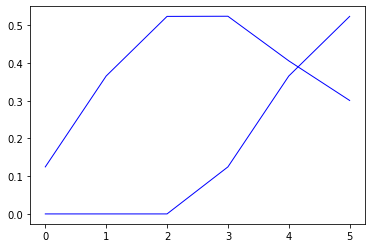

In [ ]:
inc_nm = inc_new_mat[:,0:6]
plt.plot(np.transpose(inc_nm),'b',linewidth=1.0)

In [ ]:
inc_nm = inc_nm.astype(np.float32)
inc_tn = torch.from_numpy(inc_nm)
inc_tn

tensor([[0.1246, 0.3654, 0.5234, 0.5238, 0.4056, 0.3006],
        [0.0000, 0.0000, 0.0000, 0.1246, 0.3654, 0.5234]])

In [ ]:
inc_pred = model(inc_tn,future =10)
inc_pred

tensor([[ 3.3881e-01,  5.0832e-01,  5.1608e-01,  4.1398e-01,  2.8873e-01,
          2.0099e-01,  1.3217e-01,  8.5966e-02,  5.5502e-02,  3.5436e-02,
          2.2210e-02,  1.3549e-02,  7.9828e-03,  4.5319e-03,  2.5180e-03,
          1.4613e-03],
        [ 1.1758e-01,  1.6857e-01,  2.1316e-01,  2.7035e-01,  3.7136e-01,
          4.0685e-01,  2.8479e-01,  1.8090e-01,  1.0812e-01,  6.1295e-02,
          3.2403e-02,  1.5108e-02,  5.1689e-03, -1.4096e-04, -2.5744e-03,
         -3.2758e-03]], grad_fn=<CatBackward>)

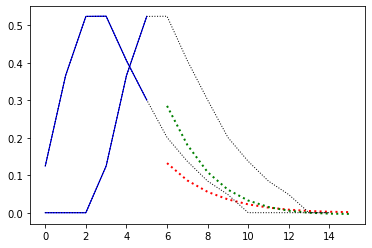

In [ ]:
inc_p = inc_pred.detach().numpy()
plt.plot(np.transpose(inc_new_mat[:,0:6]),'b',linewidth=1.0)
plt.plot(np.arange(6,16), inc_p[0,6:],'r'+":",linewidth=2.0)
plt.plot(np.arange(6,16), inc_p[1,6:],'g'+":",linewidth=2.0)
plt.plot(np.transpose(inc_new_mat[:,0:6]),'b',linewidth=1.0)

plt.plot(np.transpose(inc_new_mat[:,:15]),'k'+":",linewidth=1.0)


# RNNx e Inferencia

En la práctica nos interesa no solo acotarnos a un tipo de red de contactos, sino extender las predicciones a diversos tipos de estructuras con diversos parametros de red.

![RNNx1](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/media/RNNx1.png)

![RNNx2](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/media/RNNx2.png)

![RNNx3](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/media/RNNx3.png)

![RNNx3b](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/media/RNNx3b.png)


![RNNx4](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/media/RNNx4.png)

![RNNx5](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/media/RNNx5.png)

![RNNx6](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/media/RNNx6.png)

![RNNx7](https://raw.githubusercontent.com/leticiaram/RIIAA_2021/master/media/RNNx7.png)